# Visualization with Plotly

The plotly Python library is an <b>interactive</b>, open-source plotting library that supports <b>over 40 unique chart types</b> covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

Built on top of the Plotly JavaScript library (plotly.js), plotly enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash. The plotly Python library is sometimes referred to as "plotly.py" to differentiate it from the JavaScript library.

In plotly we can use <b> graph_object</b> or <b>Express</b> to create plots. Express is internally based on graph_object. Here, graph_object is like matplotlib while Express is like seaborn. We will use graph_object in this notebook.


ref: 

https://plotly.com/python/getting-started/

https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html

1. [Dataset](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Bubble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. [Polar Plot](#11)



<a id="1"></a>
# Loading Data

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go

import plotly.offline as po
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
#import plotly.express as px
#import random
#import plotly.figure_factory as ff

In [3]:
df_timesData = pd.read_csv("./data/timesData.csv")
print(df_timesData.shape)
df_timesData.info()

(2603, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), obje

In [4]:
df_timesData.world_rank = df_timesData.world_rank.str.replace("=", "")
df_timesData.describe()

teaching     research    citations  student_staff_ratio         year
count  2603.000000  2603.000000  2603.000000          2544.000000  2603.000000
mean     37.801498    35.910257    60.921629            18.445283  2014.075682
std      17.604218    21.254805    23.073219            11.458698     1.685733
min       9.900000     2.900000     1.200000             0.600000  2011.000000
25%      24.700000    19.600000    45.500000            11.975000  2013.000000
50%      33.900000    30.500000    62.500000            16.100000  2014.000000
75%      46.400000    47.250000    79.050000            21.500000  2016.000000
max      99.700000    99.400000   100.000000           162.600000  2016.000000

In [5]:
df_timesData.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011

<a id="2"></a>
# Line chart

* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
* fig = a figure including data and layout
* iplot() = plots the figure(fig) that is created by data and layout

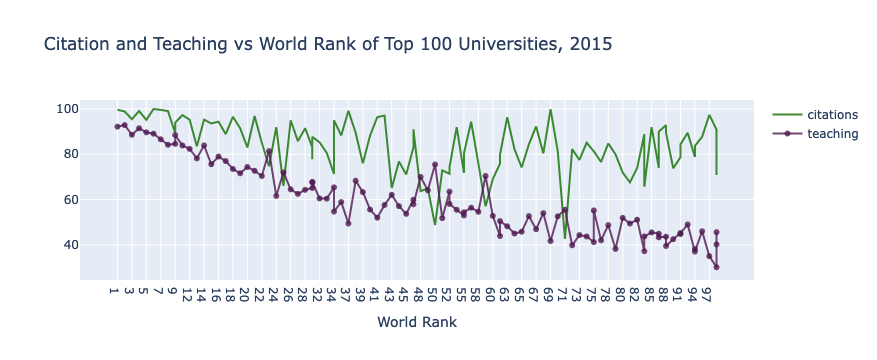

In [6]:
# prepare data frame
df = df_timesData[df_timesData.year == 2015].iloc[:100,:]

# Creating trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]

layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities, 2015',
              xaxis= dict(title= 'World Rank', ticklen= 5, zeroline= False)
             )

fig = go.Figure(data = data, layout = layout)
fig.show()




<a id="3"></a> <br>
# Scatter
<font color='red'>
Scatter Example: Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years
<font color='black'>

* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
    * y axis = it is dictionary and same with x axis
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

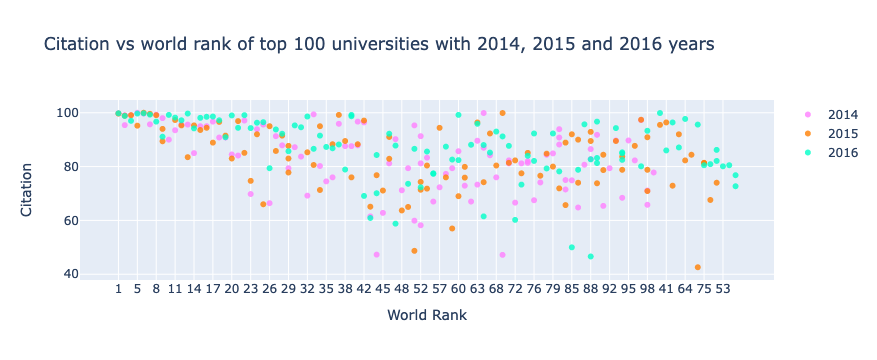

In [7]:
# prepare data frames
df2014 = df_timesData[df_timesData.year == 2014].iloc[:100,:]
df2015 = df_timesData[df_timesData.year == 2015].iloc[:100,:]
df2016 = df_timesData[df_timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)

data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data = data, layout = layout)
fig.show()

<a id="4"></a> <br>
# Bar Charts
<font color='red'>
First Bar Charts Example: citations and teaching of top 3 universities in 2014 (style1)
<font color='black'>
    
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
        * line = It is dictionary. line between bars
            * color = line color around bars
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * barmode = bar mode of bars like grouped
* fig = it includes data and layout
* show the figure(fig) that is created by data and layout

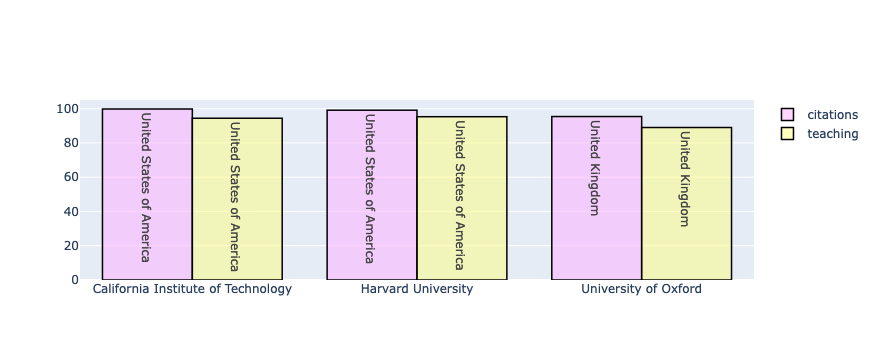

In [8]:
# prepare data frames
df2014 = df_timesData[df_timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
fig.show()

In [9]:
#your turn:
#---use plotly for task 3, 4, 5 of assignment10


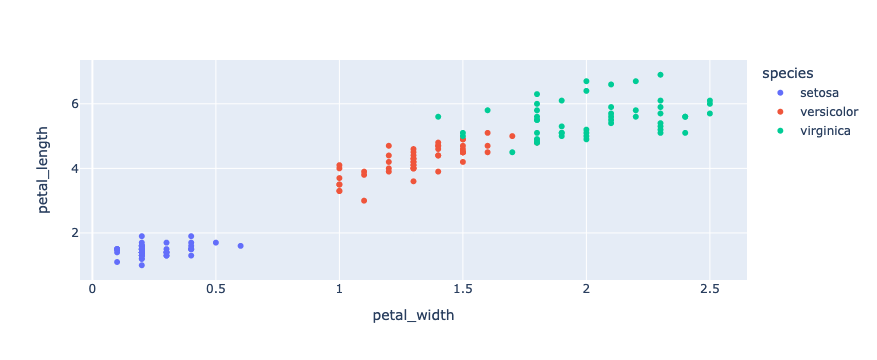

In [10]:
#an example of using plotly.express

import plotly.express as px 
  
# using the iris dataset
df = px.data.iris() 
  
# plotting the line chart
fig = px.scatter(df, x="petal_width", y="petal_length", color = 'species') 
  
# showing the plot
fig.show()

<a id="4"></a> <br>
# WordCloud
<font color = 'red'>
WordCloud will generate image of words, it uses the size of words to represent their occurences: "bigger words" mean "more frequent". </font>

We do not use plotly, but wordcloud

We want to see which countries have the largest/smallest number of universities listed in the dataset

Steps:

#1 a string of words

#2 the shape of the cloud

#3 generate the image

#4 show it up


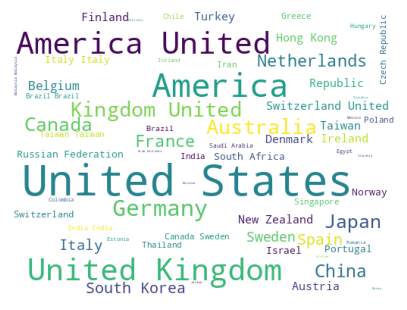

In [56]:
from wordcloud import WordCloud

country = df_timesData.country
plt.subplots(figsize=(5,5))
wc = WordCloud(background_color='white',
               width=512,
               height=384
             ).generate(" ".join(country))
plt.imshow(wc)
plt.axis('off')
plt.show()

(-0.5, 1999.5, 1999.5, -0.5)

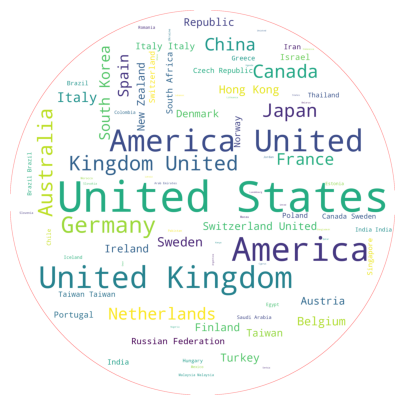

In [68]:
#wordcloud, using mask to create arbitrary shape of the cloud
#---here, we will use a circle for the mask (You can use any png image)


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

rad = 1000 # decrease this value will make the plot in poor resolution

x, y = np.ogrid[:rad * 2, 0: rad * 2]
circle_mask = (x - rad) ** 2 + (y - rad)**2 > rad**2
circle_mask = 255 * circle_mask.astype(int)

country = df_timesData.country

plt.subplots(figsize=(5,5))
wc = WordCloud(contour_width = 0.1, contour_color = 'red',
                          background_color='white',
                          mask = circle_mask
                         ).generate(" ".join(country))

plt.imshow(wc, alpha = 1)
plt.axis('off')


(-0.5, 188.5, 265.5, -0.5)

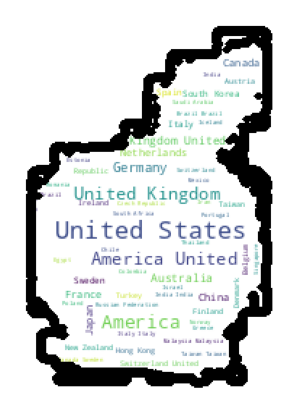

In [67]:
#wordcloud, using mask to create arbitrary shape of the cloud
#---here, we will use a circle for the mask (You can use any png image)


from wordcloud import WordCloud
from PIL import Image

apple_mask = np.array(Image.open("./apple.jpg"))
country = df_timesData.country

plt.subplots(figsize=(5,5))
wc = WordCloud(contour_width = 10, contour_color = 'black',
                          background_color='white',
                          mask = apple_mask
                         ).generate(" ".join(country))

plt.imshow(wc, alpha = 1)
plt.axis('off')


(-0.5, 1999.5, 1999.5, -0.5)

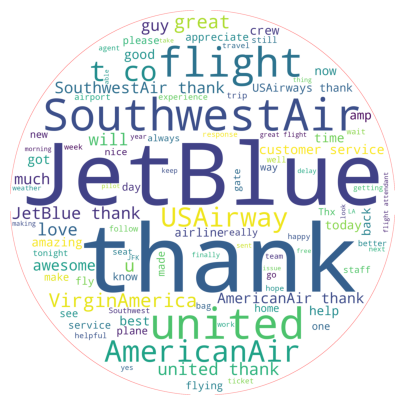

In [119]:
#your turn:
#--- work with this dataset.
#--- https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
#--- plot 03 wordclouds for the "text" column of positive, negative, and neutral sentiments.



df_tweets = pd.read_csv("./data/Tweets.csv")


rad = 1000 # decrease this value will make the plot in poor resolution

x, y = np.ogrid[:rad * 2, 0: rad * 2]
circle_mask = (x - rad) ** 2 + (y - rad)**2 > rad**2
circle_mask = 255 * circle_mask.astype(int)

tweets_pos = df_tweets[df_tweets['airline_sentiment'] == 'positive'].text

plt.subplots(figsize=(5,5))
wc = WordCloud(contour_width = 0.1, contour_color = 'red',
                          background_color='white', max_words=100,
                          mask = circle_mask
                         ).generate(" ".join(tweets_pos))

plt.imshow(wc, alpha = 1)
plt.axis('off')



In [118]:
df_tweets.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

<a id="11"></a> <br>
# Polar(Radar) plot
<font color='red'>
Radar plot is to compare objects in multiple aspects

<font color='black'>
    
* Import graph_objs as *go*
* Creating traces
    * r is the line you want to plot, = lines[i], 
    * theta is the aspects you want to compare, = categories,
    * name is for legend, = df['university_name'].values[i])
* data = is a list that we add traces into it
* layout = it is dictionary.
* fig = it includes data and layout
* show the figure(fig) that is created by data and layout

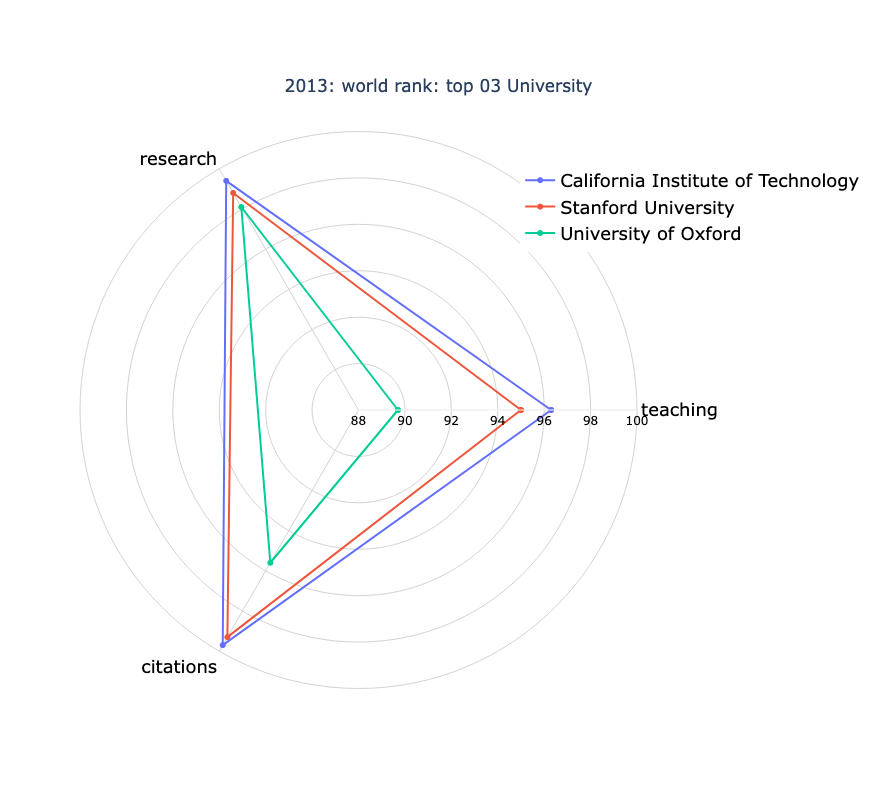

In [114]:
n_unis, year = 3, 2013

categories = ['teaching', 'research', 'citations']

df = df_timesData[df_timesData.year == year].iloc[:n_unis,:]

lines = df[categories].values.tolist()
for i in range(len(lines)):
    lines[i].append(lines[i][0]) 

# create traces

categories = [*categories, categories[0]]

data = []
for i in range(len(lines)):
    trace = go.Scatterpolar(r = lines[i], theta = categories,
                name = df['university_name'].values[i])
                #line_color = line_colors[i])
    data.append(trace)

layout=go.Layout(
        width=800, height=800,    
        title=go.layout.Title(text=str(year) + ': world rank: top 03 University', y = 0.9,
        x = 0.5, xanchor = 'center', yanchor = 'top'),
        polar = dict(radialaxis = dict(gridwidth=1, color = 'black',
                     range=[88, 100], gridcolor = "lightgrey"), bgcolor = 'white',
                     angularaxis = dict(color = "black", linecolor = 'lightgrey', showgrid=True, 
                                        showline=True, gridcolor='lightgrey', tickfont = dict(size = 18))),
        legend = dict(y = 0.9, x = 1.1, xanchor = 'center', yanchor = 'top',font = dict(size = 18, color = 'black')),

        showlegend=True
    )

fig = go.Figure(data = data, layout = layout)
fig.show()

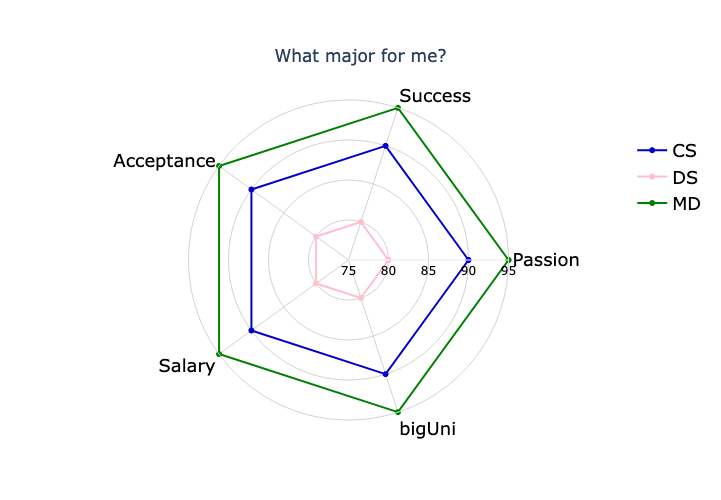

In [127]:
#your turn:
#--- you are thinking about what majors you should do
#--- consider 03 majors (for example CS, DS, and Medicine)
#--- for each major, score it in 05 categories in a range from 0 .. 100 (for example: )
#--- Passion: how much do you like CS, compared with DS and Medicine

#--- use a polar plot to compare all three majors in terms of the catergories,
#---set line_color for each line

categories = ['Passion', 'Success', 'Acceptance', 
              'Salary', 'bigUni']

categories = [*categories, categories[0]]

CS = [90, 90, 90, 90, 90, 90]
DS = [80, 80, 80, 80, 80, 80]
MD = [95, 95, 95, 95, 95, 95]

legends = ['CS', 'DS', 'MD']
line_colors = ['mediumblue', 'pink', 'green']

lines = [CS, DS, MD]
data = []
for i in range(len(lines)):
    trace = go.Scatterpolar(r = lines[i], theta = categories,
                name = legends[i],
                line_color = line_colors[i])
    data.append(trace)

layout=go.Layout(
        width=500, height=500,    
        title=go.layout.Title(text = 'What major for me?', y = 0.9,
        x = 0.5, xanchor = 'center', yanchor = 'top'),
        polar = dict(radialaxis = dict(gridwidth=1, color = 'black',
                     range=[75, 95], gridcolor = "lightgrey"), bgcolor = 'white',
                     angularaxis = dict(color = "black", linecolor = 'lightgrey', showgrid=True, 
                                        showline=True, gridcolor='lightgrey', tickfont = dict(size = 18))),
        legend = dict(y = 0.9, x = 1.1, xanchor = 'center', yanchor = 'top',font = dict(size = 18, color = 'black')),

        showlegend=True
    )

fig = go.Figure(data = data, layout = layout)
fig.show()


In [116]:
df_timesData

world_rank                        university_name  \
0             1                     Harvard University   
1             2     California Institute of Technology   
2             3  Massachusetts Institute of Technology   
3             4                    Stanford University   
4             5                   Princeton University   
...         ...                                    ...   
2598    601-800                    Yeungnam University   
2599    601-800            Yıldız Technical University   
2600    601-800               Yokohama City University   
2601    601-800           Yokohama National University   
2602    601-800                     Yuan Ze University   

                       country  teaching international  research  citations  \
0     United States of America      99.7          72.4      98.7       98.8   
1     United States of America      97.7          54.6      98.0       99.9   
2     United States of America      97.8          82.3      91.4       99.9   
3     United States of America      98.3          29.5      98.1       99.2   
4     United States of America      90.9          70.3      95.4       99.9   
...                        ...       ...           ...       ...        ...   
2598               South Korea      18.6          24.3      10.9       26.5   
2599                    Turkey      14.5          14.9       7.6       19.3   
2600                     Japan      24.0          16.1      10.2       36.4   
2601                     Japan      20.1          23.3      16.0       13.5   
2602                    Taiwan      16.2          17.7      18.3       28.6   

     income total_score num_students  student_staff_ratio  \
0      34.5        96.1       20,152                  8.9   
1      83.7        96.0        2,243                  6.9   
2      87.5        95.6       11,074                  9.0   
3      64.3        94.3       15,596                  7.8   
4         -        94.2        7,929                  8.4   
...     ...         ...          ...                  ...   
2598   35.4           -       21,958                 15.3   
2599   44.0           -       31,268                 28.7   
2600   37.9           -        4,122                  3.7   
2601   40.4           -       10,117                 12.1   
2602   39.8           -        8,663                 20.6   

     international_students female_male_ratio  year  
0                       25%               NaN  2011  
1                       27%           33 : 67  2011  
2                       33%           37 : 63  2011  
3                       22%           42 : 58  2011  
4                       27%           45 : 55  2011  
...                     ...               ...   ...  
2598                     3%           48 : 52  2016  
2599                     2%           36 : 64  2016  
2600                     3%               NaN  2016  
2601                     8%           28 : 72  2016  
2602                     4%           43 : 57  2016  

[2603 rows x 14 columns]

In [ ]:
!pip install wordcloud